In [7]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from numpy import mean
from math import sqrt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [2]:
series = read_csv('datasets/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
1959-01-06    34.666667
1959-01-07    39.333333
1959-01-08    39.000000
1959-01-09    42.000000
1959-01-10    36.000000
Name: Births, dtype: float64


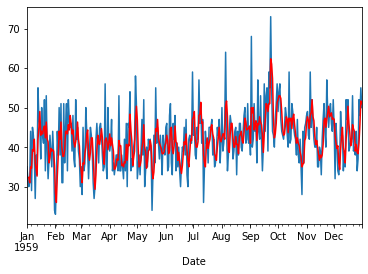

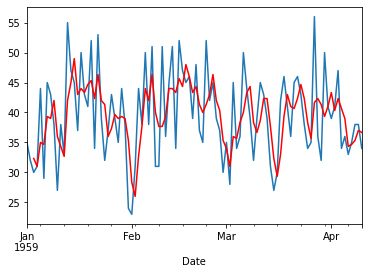

In [3]:
# Tail rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

series.plot()
rolling_mean.plot(color='red')
pyplot.show()

# Zoomed plot
series[:100].plot()
rolling_mean[:100].plot(color='red')
pyplot.show()

Calculating moving average of a time series makes the assumption that time series is stationary i.e. does not show obvious trends or seasonality.

In [4]:
# Moving Average - Feature Engineering
# Moving average is calculated and added as a new input feature to predict the next time step
# For a window size of 3, we must shift the series forward by 2 time steps. 
# This is so we include previous two observations as well as the current observation in moving average to predict the next value
df = DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width-1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't', 't+1']
print(dataframe.head(10))

        mean     t  t+1
0        NaN   NaN   35
1        NaN  35.0   32
2        NaN  32.0   30
3        NaN  30.0   31
4  32.333333  31.0   44
5  31.000000  44.0   29
6  35.000000  29.0   45
7  34.666667  45.0   43
8  39.333333  43.0   38
9  39.000000  38.0   27


In [26]:
# Moving Average Smoothing as Forecast Model
# Data preparation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]

print('X shape: ', X.shape)
print('history size: ', len(history))
print('test size: ', len(test))

X shape:  (365,)
history size:  3
test size:  362


In [27]:
# Moving Average Smoothing as Forecast Model
# Predictions
predictions = list()
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expect=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=32.333333, expect=31.000000
predicted=31.000000, expect=44.000000
predicted=35.000000, expect=29.000000
predicted=34.666667, expect=45.000000
predicted=39.333333, expect=43.000000
predicted=39.000000, expect=38.000000
predicted=42.000000, expect=27.000000
predicted=36.000000, expect=38.000000
predicted=34.333333, expect=33.000000
predicted=32.666667, expect=55.000000
predicted=42.000000, expect=47.000000
predicted=45.000000, expect=45.000000
predicted=49.000000, expect=37.000000
predicted=43.000000, expect=50.000000
predicted=44.000000, expect=43.000000
predicted=43.333333, expect=41.000000
predicted=44.666667, expect=52.000000
predicted=45.333333, expect=34.000000
predicted=42.333333, expect=53.000000
predicted=46.333333, expect=39.000000
predicted=42.000000, expect=32.000000
predicted=41.333333, expect=37.000000
predicted=36.000000, expect=43.000000
predicted=37.333333, expect=39.000000
predicted=39.666667, expect=35.000000
predicted=39.000000, expect=44.000000
predicted=39

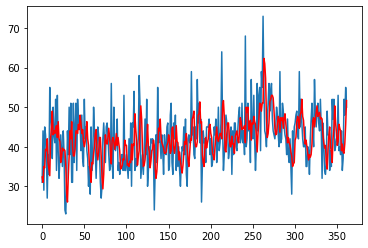

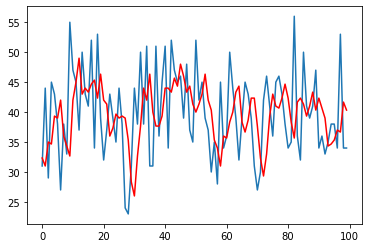

In [28]:
# Moving Average Smoothing as Forecast Model
# Plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# Zoom Plot
pyplot.plot(test[:100])
pyplot.plot(predictions[:100], color='red')
pyplot.show()